# Statistical Power Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

import math

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [2]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=0.50, nobs1=None, alpha=0.05, power=0.80, ratio=1.0)
2 * math.ceil(result)

128

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [3]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=None, nobs1=100, alpha=0.05, power=0.80, ratio=1.0)
result

0.39813911739112756

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

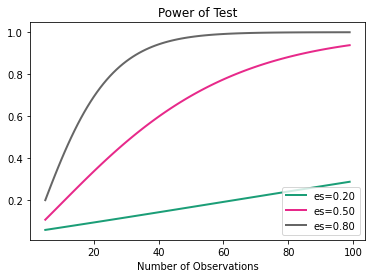

In [4]:
effect_sizes = np.array([.2,.5,.8])
sample_sizes = np.array(range(5, 100))

analysis = TTestIndPower()
result = analysis.plot_power(dep_var='nobs', nobs=sample_sizes,effect_size=effect_sizes)
plt.show()

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [5]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=0.4, nobs1=100, alpha=0.05, power=None, ratio=1.0)
result

0.8036474965430769

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

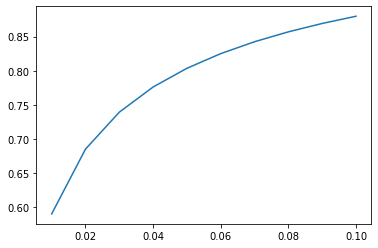

In [15]:
alpha_sizes = np.array([.01,.02,.03,.04,.05,.06,.07,.08,.09,.1])

analysis = TTestIndPower()
results = []

for a in alpha_sizes:
  r = analysis.solve_power(alpha=a, power=None, nobs1=100, effect_size=0.4, ratio=1.0)
  results.append(r)

plt.plot(alpha_sizes, results)
plt.show()

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [16]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

In [25]:
titanic = pd.read_csv(data_url)

titanic = titanic.dropna()

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Summarize the number of observations and average age per group.

In [28]:
survived = titanic.iloc[(titanic["Survived"] == 1).values][["Age"]]
not_survived = titanic.iloc[(titanic["Survived"] == 0).values][["Age"]]

print(stats.describe(survived['Age']))
print(stats.describe(not_survived['Age']))

DescribeResult(nobs=123, minmax=(0.92, 80.0), mean=32.905853658536586, variance=221.71546053578567, skewness=0.11036517600265433, kurtosis=0.031225201077919262)
DescribeResult(nobs=60, minmax=(2.0, 71.0), mean=41.35, variance=247.73135593220334, skewness=-0.30756108127889464, kurtosis=-0.2764299013556979)


### Perform t-test.

In [29]:
stats.ttest_ind(survived['Age'], not_survived['Age'])

Ttest_indResult(statistic=-3.53435125095576, pvalue=0.0005189503307881672)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [35]:
def effect(sample1, sample2):
  mean_of_sample1 = np.mean(sample1)
  mean_of_sample2 = np.mean(sample2)
  n_obs1 = len(sample1)
  n_obs2 = len(sample2)
  var1 = np.var(sample1)
  var2 = np.var(sample2)
  pooled_stdev = np.sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))
  return (mean_of_sample1 - mean_of_sample2) / pooled_stdev

**Use the effect size you calculated to compute the statistical power of this test.**

In [59]:
effect(survived['Age'], not_survived['Age'])
ratio = 60/123

analysis = TTestIndPower()

result = analysis.solve_power(effect_size=.55967, nobs1=123, alpha=0.05, power=None, ratio=ratio)
result

0.9424013776575748

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [63]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=None, nobs1=123, alpha=0.05, power=.8, ratio=ratio)
result

0.4435226492804944

**Determine the sample size necessary to get a statistical power of 0.8.**

In [65]:
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=.5596, nobs1=None, alpha=0.05, power=.8, ratio=ratio)
2 * math.ceil(result)

156

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

0.007422337615246621


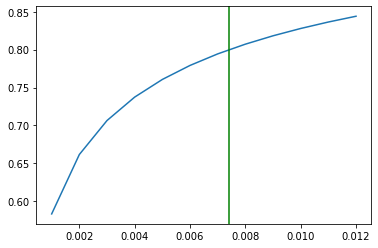

In [73]:
alpha_sizes = np.array([.001,.002,.003,.004,.005,.006,.007,.008,.009,.01,.011,.012])

analysis = TTestIndPower()
results = []

for a in alpha_sizes:
  r = analysis.solve_power(alpha=a, power=None, nobs1=123, effect_size=-.55967, ratio=ratio)
  results.append(r)

plt.plot(alpha_sizes, results)
t = analysis.solve_power(alpha=None, power=.8, nobs1=123, effect_size=-.55967, ratio=ratio)
plt.axvline(t,color='green')
print(t)
plt.show()